In [ ]:
''' 
@@ Authur: Sanyukta Suman

Which kind of data set did you choose for your Project?

Answer- I have choosen the dataset which contains movie reviews from Rotten Tomatoes.

Description of dataset in mathematical correct formalism

Universe Ω = {Website (Rotten Tomatoes), User who is writing a review, Internet}
 Elementary Events ω= The possibility of the user writing the review in the comment section.
Measurable Function (RV-function)= procedure of reading reviews given by the users and measuring the reviews according to the sentiment.
Data Value Space= {PhraseId, SentenceId, Phrase, Sentiment}



------ 
------ Objective of this project is multi-class classification,instead of positive/negative
prediction, we will classify phares in sentiment scale 0 to 4
where 0 is the lowest sentiment (negative) and 4 is the highest sentiment(positive)-------
'''



In [ ]:
# Describe the RV-Fuction
'''The RV-function of the dataset is procedure of giving rating, measure of helpfullness and typing Review Text'''

#Define Data Value Space 
'''Data value set(DVS) ={PhraseId, SentenceId, Phrase, Sentiment}'''

In [1]:
#importing important libraries
import numpy as np 
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
lemmatizer = WordNetLemmatizer()

from tqdm import tqdm
from nltk.tokenize import TweetTokenizer

from time import time  # To time our operations
from collections import defaultdict  # For word frequency

#import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

#set random seed for the session
random.seed(1)
np.random.seed(1)

In [18]:
#load train data
df_train=pd.read_csv("train.tsv", sep='\t', nrows=100)

In [3]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df_train.shape

(100, 4)

In [19]:
#load test data
df_test=pd.read_csv("test.tsv", sep='\t', nrows=100)

In [6]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [7]:
#method to clean the reviews, tokenize, remove stop words and lemmatize them.
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #stop words removal
        omit_words = set(stopwords.words('english'))
        words = [x for x in words if x not in omit_words]
        
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(df_train)
test_sentences = clean_sentences(df_test)
print(len(train_sentences))
print(len(test_sentences))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 394.31it/s]


100
100


In [8]:
word_freq_train = defaultdict(int)
for sent in train_sentences:
    for i in sent:
        word_freq_train[i] += 1
len(word_freq_train)

word_freq_test = defaultdict(int)
for sent in test_sentences:
    for i in sent:
        word_freq_test[i] += 1
len(word_freq_test)

38

In [88]:
sorted(word_freq_train, key=word_freq_train.get, reverse=True)

[]

In [95]:
df=pd.DataFrame([word_freq_train])

In [96]:
df

,series,escapade,demonstrating,adage,good,goose,also,gander,occasionally,amuses,...,fan,ismail,merchant,work,suspect,would,hard,time,sitting,one
0,4,5,7,8,14,12,5,9,9,10,...,4,6,7,5,6,2,2,2,2,2


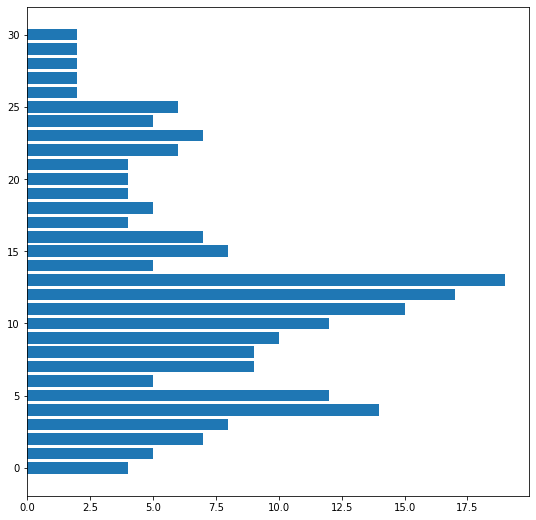

In [12]:
import seaborn as sns
fig, _ = plt.subplots()

fig.set_size_inches(9, 9)

#plt.plot(df) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.barh(range(len(word_freq_train)), list(word_freq_train.values()), align='center')
#plt.yticks(range(len(w_train)), list(w_train.keys()))
plt.show() 

In [80]:
sorted(word_freq_test, key=word_freq_test.get, reverse=True)[:10]

['jez',
 'butterworth',
 'birthday',
 'girl',
 'stage',
 'trained',
 'mojo',
 'rrb',
 'sad',
 'decline']

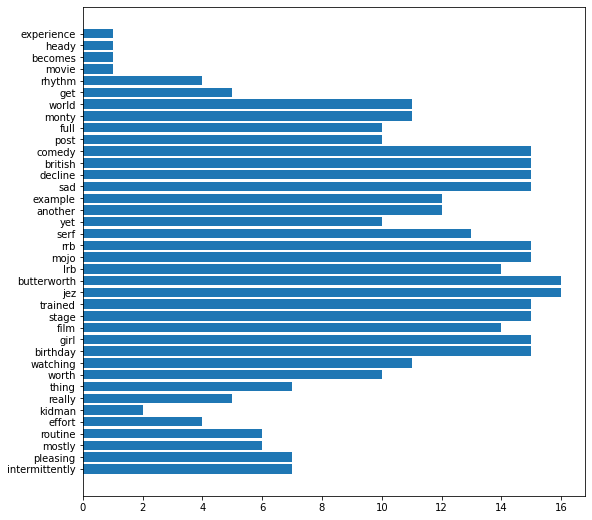

In [60]:
import seaborn as sns
fig, _ = plt.subplots()

fig.set_size_inches(9, 9)

#plt.plot(df) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.barh(range(len(word_freq_test)), list(word_freq_test.values()), align='center')
plt.yticks(range(len(word_freq_test)), list(word_freq_test.keys()))
plt.show() 

In [13]:
df_test=pd.DataFrame(sorted(word_freq_test.values()))

In [16]:
dist_train=pd.DataFrame(sorted(word_freq_train.values()))

In [17]:
dist_train

,0
0,2
1,2
2,2
3,2
4,2
5,4
6,4
7,4
8,4
9,4


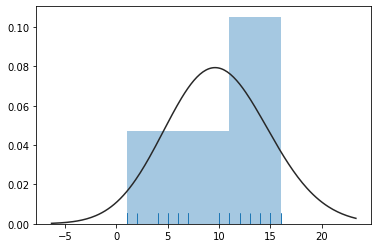

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

import math

mu = 0
variance = 2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.distplot(list(word_freq_test.values()), fit=stats.gamma, kde=False,hist=True,rug=True) 
#plt.plot(sorted(word_freq_test.values()))
plt.show()

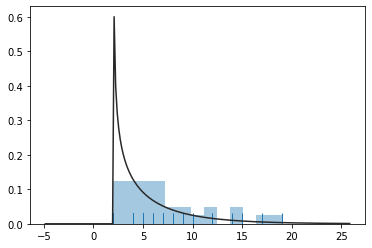

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

import math

mu = 0
variance = 2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.distplot(list(word_freq_train.values()), fit=stats.gamma, kde=False ,bins=13,hist=True,rug=True) 
#plt.plot(sorted(word_freq_test.values()))
plt.show()

In [34]:
import multiprocessing

from gensim.models import Word2Vec

INFO - 15:33:38: 'pattern' package not found; tag filters are not available for English


In [35]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [36]:
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [37]:
t = time()

w2v_model.build_vocab(train_sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:33:43: collecting all words and their counts
INFO - 15:33:43: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:33:43: collected 31 word types from a corpus of 221 raw words and 100 sentences
INFO - 15:33:43: Loading a fresh vocabulary
INFO - 15:33:43: effective_min_count=1 retains 31 unique words (100% of original 31, drops 0)
INFO - 15:33:43: effective_min_count=1 leaves 221 word corpus (100% of original 221, drops 0)
INFO - 15:33:43: deleting the raw counts dictionary of 31 items
INFO - 15:33:43: sample=6e-05 downsamples 31 most-common words
INFO - 15:33:43: downsampling leaves estimated 9 word corpus (4.3% of prior 221)
INFO - 15:33:43: estimated required memory for 31 words and 300 dimensions: 89900 bytes
INFO - 15:33:43: resetting layer weights


Time to build vocab: 0.0 mins


In [38]:
t = time()

w2v_model.train(train_sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 15:33:50: training model with 7 workers on 31 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 15:33:50: worker thread finished; awaiting finish of 6 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 5 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 4 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 3 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 2 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 1 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 0 more threads
INFO - 15:33:50: EPOCH - 1 : training on 221 raw words (8 effective words) took 0.0s, 341 effective words/s
INFO - 15:33:50: worker thread finished; awaiting finish of 6 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 5 more threads
INFO - 15:33:50: worker thread finished; awaiting finish of 4 more threads
INFO - 15:

Time to train the model: 0.01 mins


In [39]:
w2v_model.init_sims(replace=True)

INFO - 15:33:56: precomputing L2-norms of word weight vectors


In [40]:
w2v_model.wv.most_similar(positive=["good"])

[('quiet', 0.12161903083324432),
 ('work', 0.11659252643585205),
 ('ismail', 0.11650417000055313),
 ('suspect', 0.08039720356464386),
 ('demonstrating', 0.06757642328739166),
 ('hard', 0.05425204336643219),
 ('would', 0.034317098557949066),
 ('also', 0.03048618882894516),
 ('story', 0.029819171875715256),
 ('amount', 0.02963307686150074)]

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [42]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=16).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
   

In [43]:
w2v_model.wv.most_similar(positive=["good"])

[('quiet', 0.12161903083324432),
 ('work', 0.11659252643585205),
 ('ismail', 0.11650417000055313),
 ('suspect', 0.08039720356464386),
 ('demonstrating', 0.06757642328739166),
 ('hard', 0.05425204336643219),
 ('would', 0.034317098557949066),
 ('also', 0.03048618882894516),
 ('story', 0.029819171875715256),
 ('amount', 0.02963307686150074)]

In [45]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

NameError: name 'model' is not defined

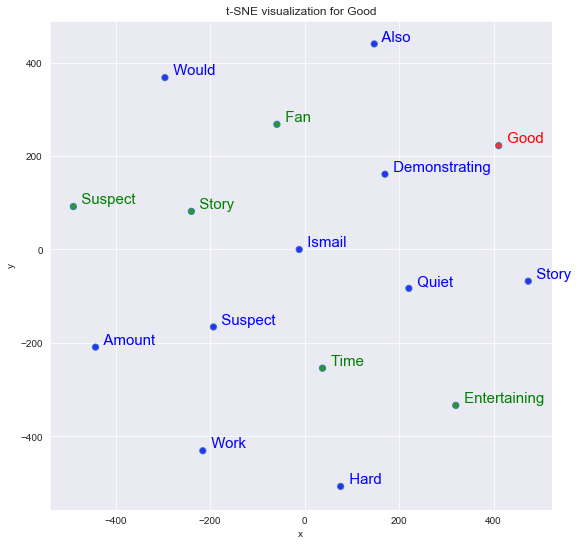

In [44]:
tsnescatterplot(w2v_model, 'good', ['fan', 'story', 'suspect', 'entertaining', 'time'])